## **Data Cleaning**

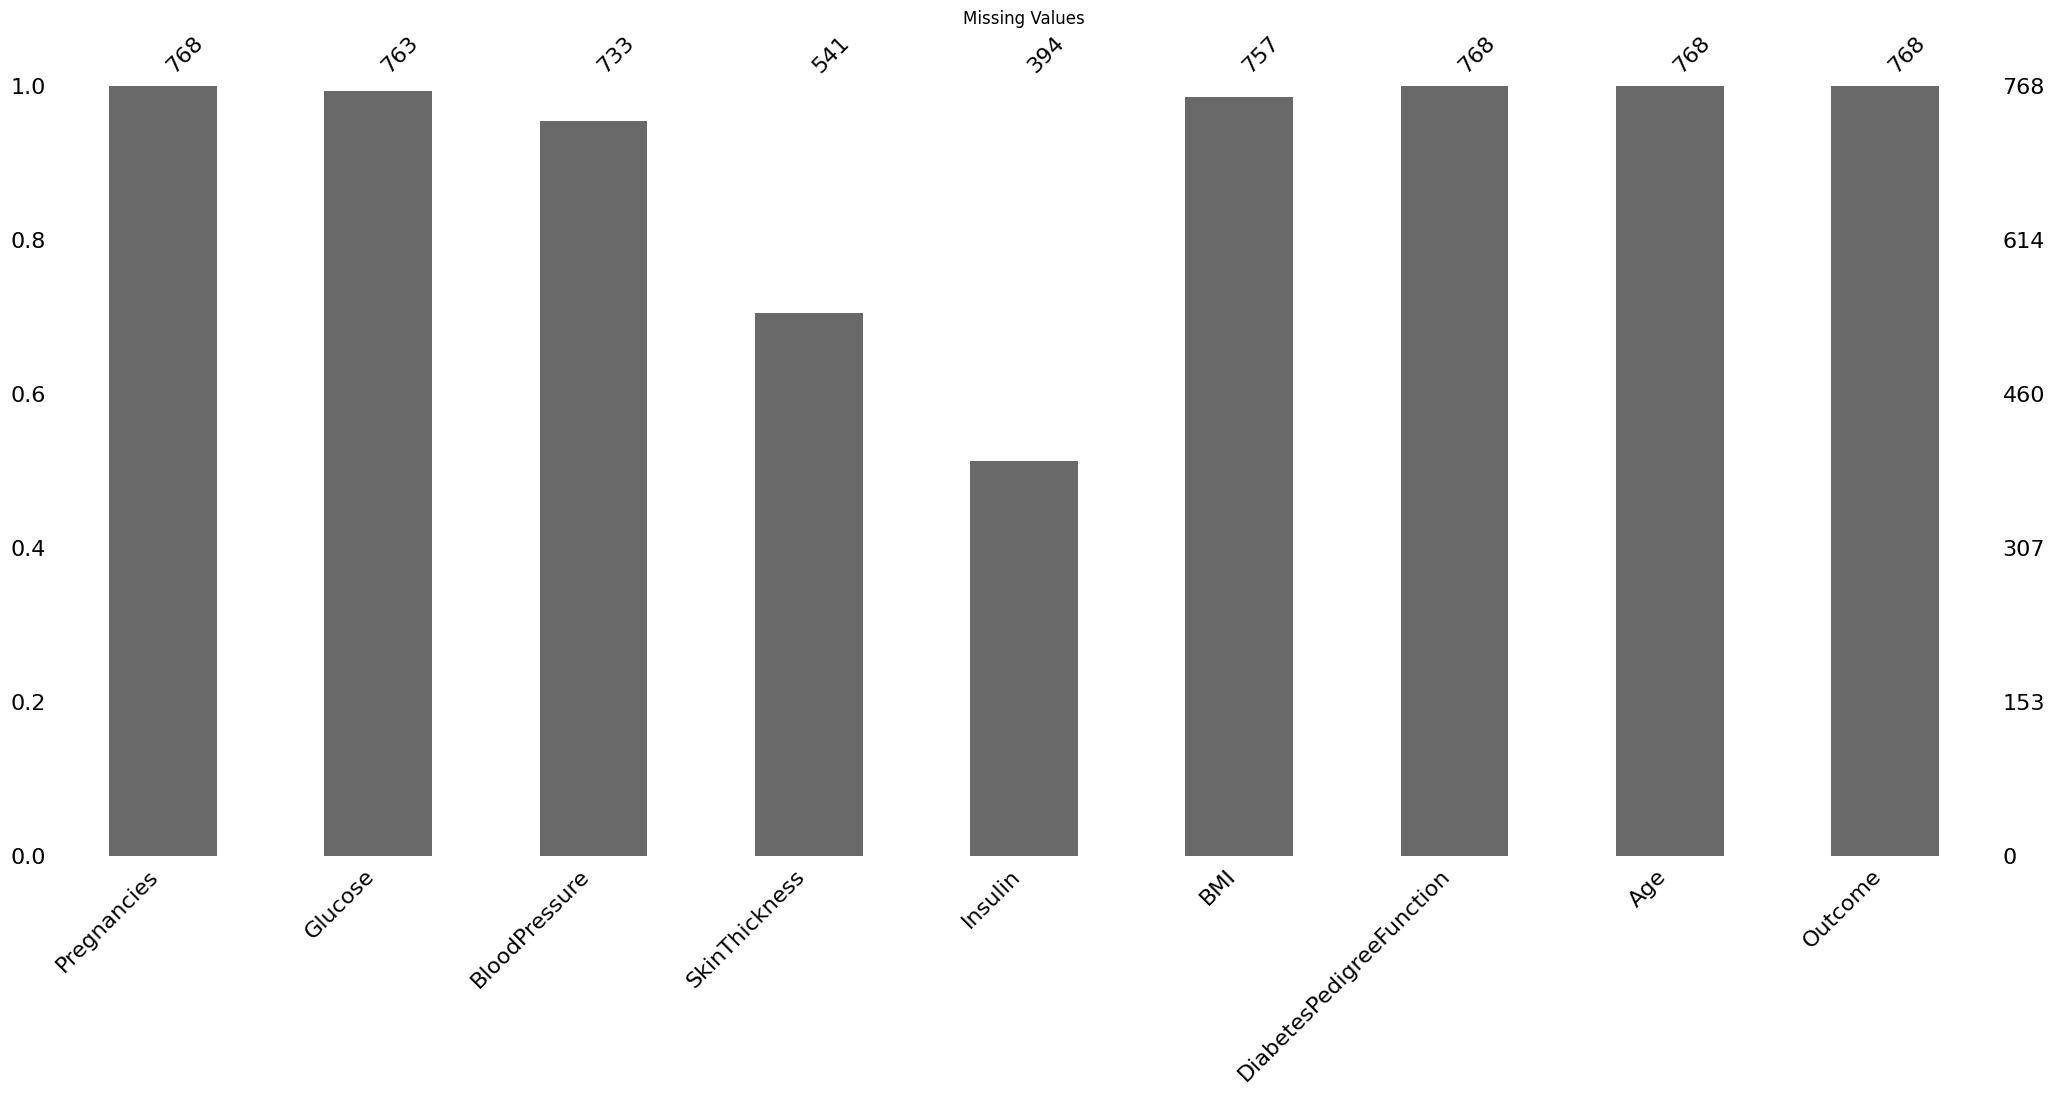

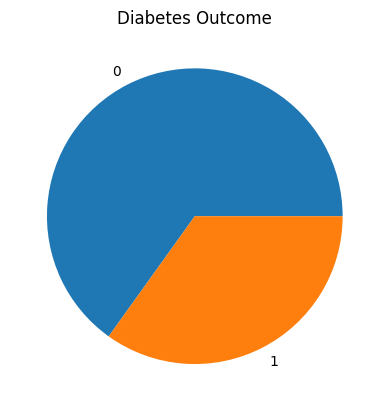

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Category
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1,Obese I
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0,Overweight
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1,Normal
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0,Overweight
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1,Obese III


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv('/content/DataCleaning_diabetes.csv')

# Replace zeroes with NaN in selected columns
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols] = df[cols].replace(0, np.nan)

# Visualize missing data
msno.bar(df)
plt.title('Missing Values')
plt.show()

# Impute missing values with mean
df[cols] = SimpleImputer(strategy='mean').fit_transform(df[cols])

# Plot outcome distribution
df['Outcome'].value_counts().plot.pie()
plt.title('Diabetes Outcome')
plt.ylabel('')
plt.show()

# Create BMI categories
df['BMI_Category'] = pd.cut(
    df['BMI'],
    bins=[-np.inf, 18.5, 24.9, 29.9, 34.9, 39.9, np.inf],
    labels=['Underweight', 'Normal', 'Overweight', 'Obese I', 'Obese II', 'Obese III']
)

df.head()


# **Data Visualization**

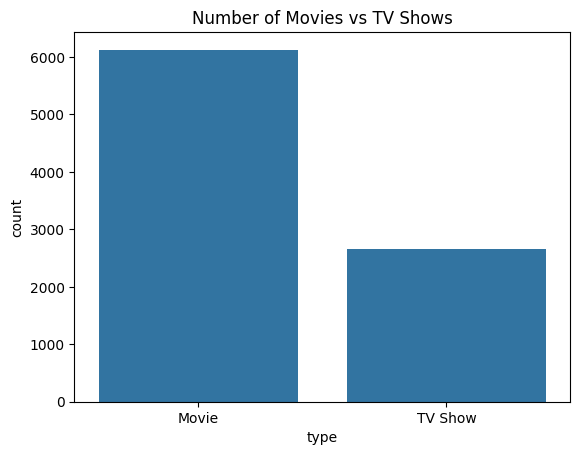

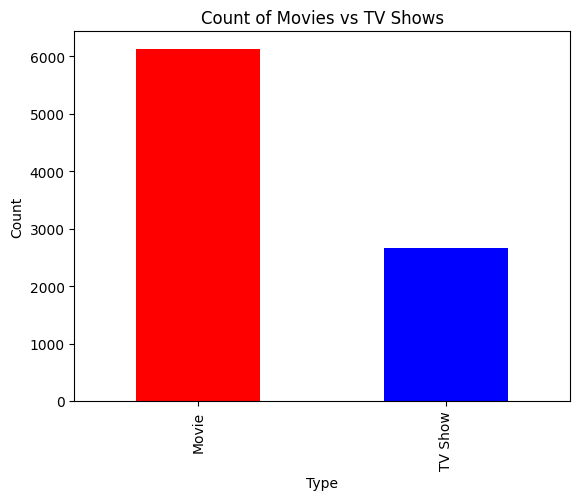

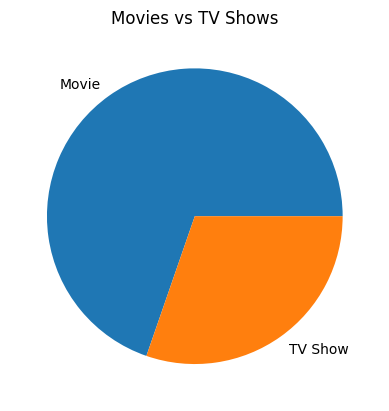

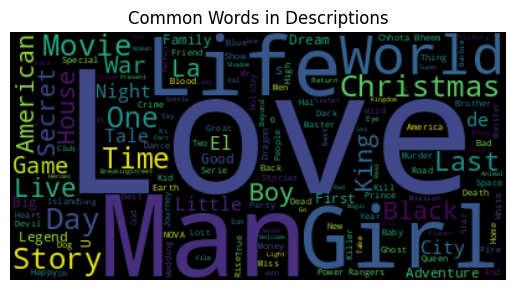

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load dataset
df = pd.read_csv('/content/data_visualization_netflix.csv')

# Basic cleanup
df['date_added'] = pd.to_datetime(df['date_added'])

# Plot: Distribution of content type
sns.countplot(data=df, x='type')
plt.title('Number of Movies vs TV Shows')
plt.show()

# Plot: Bar chart
df['year_added'] = df['date_added'].dt.year
df['year_added'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title('New Titles Added by Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()


# Pie chart
df['type'].value_counts().plot(kind='pie')
plt.title('Movies vs TV Shows')
plt.ylabel('')
plt.show()

# WordCloud: Description keywords
text = ' '.join(df['title'].dropna())
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Descriptions')
plt.show()


# **Evaluation metrics**

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('/content/EvaluationMetrics_IRIS.csv')

# Check the column names of the DataFrame
print(df.columns)

le = LabelEncoder()
df['variety_encoded'] = le.fit_transform(df['species'])

# Split into features (X) and target (y)
X = df[['sepal_length','sepal_width', 'petal_length','petal_width']]
y = df['species']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict values
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
Accuracy: 100.00%

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



# **SMOTE**

In [ ]:
pip install imbalanced-learn

smoker
no     1064
yes     274
Name: count, dtype: int64


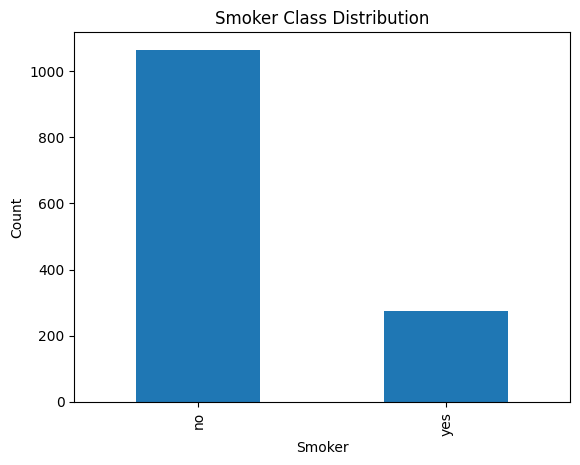

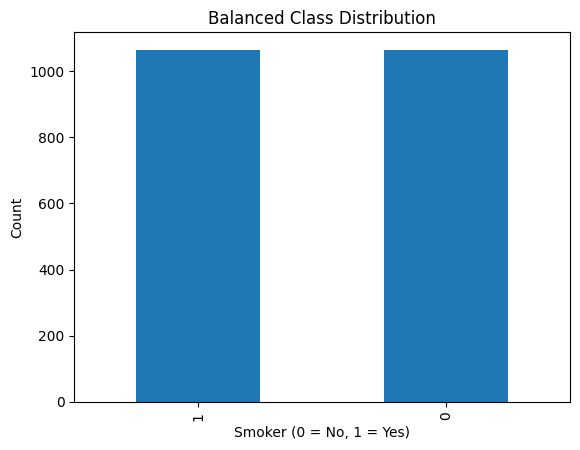

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/SMOTE_insurance.csv")

# Count value distribution in 'smoker' column
smoker_counts = df['smoker'].value_counts()
print(smoker_counts)

# Plot distribution
smoker_counts.plot(kind='bar', title='Smoker Class Distribution', xlabel='Smoker', ylabel='Count')
plt.show()

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("/content/SMOTE_insurance.csv")

# Encode categorical features
df_encoded = df.copy()
label_encoders = {}
for col in ['sex', 'smoker', 'region']:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Separate features and target
X = df_encoded.drop('smoker', axis=1)
y = df_encoded['smoker']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Show new distribution
pd.Series(y_resampled).value_counts().plot(kind='bar', title='Balanced Class Distribution')
plt.xlabel('Smoker (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


# **Outlier Detection**

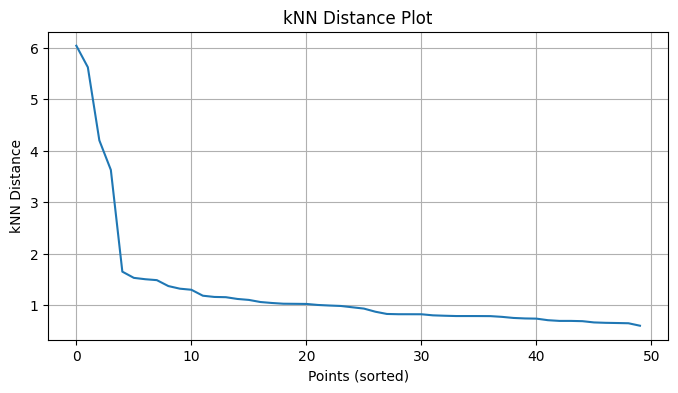

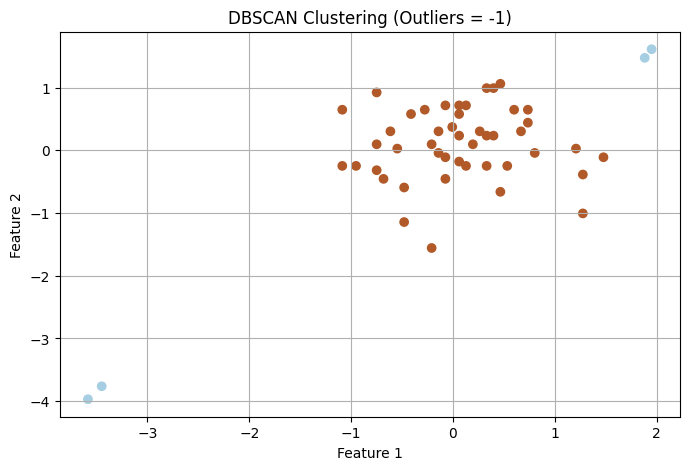

Detected kNN Outliers:
   Student_ID  Math_Score  Science_Score  English_Score  Study_Hours_Per_Week  \
33       S034          64             60             96                    11   
46       S047          20             22             25                     2   
47       S048         100            100            100                    35   
48       S049          18             19             20                     1   
49       S050          99             98             97                    40   

    kNN_Outlier  DBSCAN_Outlier  
33            1               0  
46            1               1  
47            1               1  
48            1               1  
49            1               1  

Detected DBSCAN Outliers:
   Student_ID  Math_Score  Science_Score  English_Score  Study_Hours_Per_Week  \
46       S047          20             22             25                     2   
47       S048         100            100            100                    35   
48       S049   

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

# Load the dataset
df = pd.read_excel("/content/Student_Performance_With_Outliers (1).xlsx")

# Drop Student_ID (non-numeric)
data = df.drop(columns=["Student_ID"])

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# -------- 1. Distance-Based Outlier Detection (kNN) --------
def knn_outlier_scores(data, k=5):
    nbrs = NearestNeighbors(n_neighbors=k)
    nbrs.fit(data)
    distances, _ = nbrs.kneighbors(data)
    return distances[:, -1]  # distance to the kth nearest neighbor

# Compute kNN outlier scores
knn_scores = knn_outlier_scores(data_scaled)

# Plot kNN scores
plt.figure(figsize=(8, 4))
plt.title("kNN Distance Plot")
plt.plot(sorted(knn_scores, reverse=True))
plt.xlabel("Points (sorted)")
plt.ylabel("kNN Distance")
plt.grid(True)
plt.show()

# Flag top N as outliers (e.g., top 5)
df["kNN_Outlier"] = 0
top_n = 5
outlier_indices = knn_scores.argsort()[-top_n:]
df.loc[outlier_indices, "kNN_Outlier"] = 1

# -------- 2. Density-Based Outlier Detection (DBSCAN) --------
dbscan = DBSCAN(eps=1.5, min_samples=5)
labels = dbscan.fit_predict(data_scaled)

# Add DBSCAN outlier label (-1 = outlier)
df["DBSCAN_Outlier"] = (labels == -1).astype(int)

# Visualize DBSCAN Clusters (first two features)
plt.figure(figsize=(8, 5))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=labels, cmap='Paired')
plt.title("DBSCAN Clustering (Outliers = -1)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

# View detected outliers
print("Detected kNN Outliers:")
print(df[df["kNN_Outlier"] == 1])

print("\nDetected DBSCAN Outliers:")
print(df[df["DBSCAN_Outlier"] == 1])


# **Normal Distribution Curve**

<ipython-input-13-d81c91385cf0>:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(original_data, ax=ax[0])
<ipython-input-13-d81c91385cf0>:30: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(normalized_data[0], ax=ax[1])


Text(0.5, 1.0, 'Normalized data')

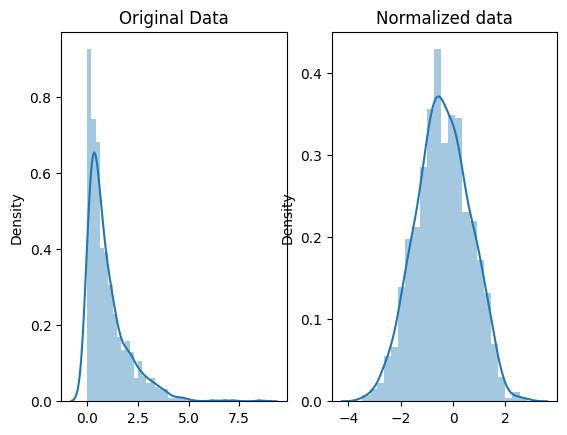

In [ ]:
# modules we'll use
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# read in all our data
kickstarters_2017 = pd.read_csv("/content/normal_distribution_curve.csv")

# set seed for reproducibility
np.random.seed(0)

# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size = 1000)
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized data")